## Import necessary python modules

In [1]:
from os import path

import import_ipynb
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from helpful_functions import *
from streakimage2.streakimage import StreakImage

importing Jupyter notebook from helpful_functions.ipynb


## Load source files

In [2]:
folder = "./files/camera_correction/"

The following cell loads six files (one for each time range) and their backgrounds. Inside the loops Python's f-string are used. *f* stands for *format*. A string variable wrapped in braces is replaced by its value.

In [3]:
bg_dict = {}

for tr in range(1, 7):
    bg_dict[f"bg_ST{tr}_g10_100x2002ms"] = StreakImage(
        path.join(folder, f"corr file bg gain10 ST{tr} 100x2s.img")
    )

img_dict = {}

for tr in range(1, 7):
    img_dict[f"ST{tr}_correction"] = StreakImage(
        path.join(folder, f"corr file slit60 gain10 ST{tr} 100x2s.img"),
        bg_dict=bg_dict,
        title=f"ST{tr} corr",
    )

## Plot images

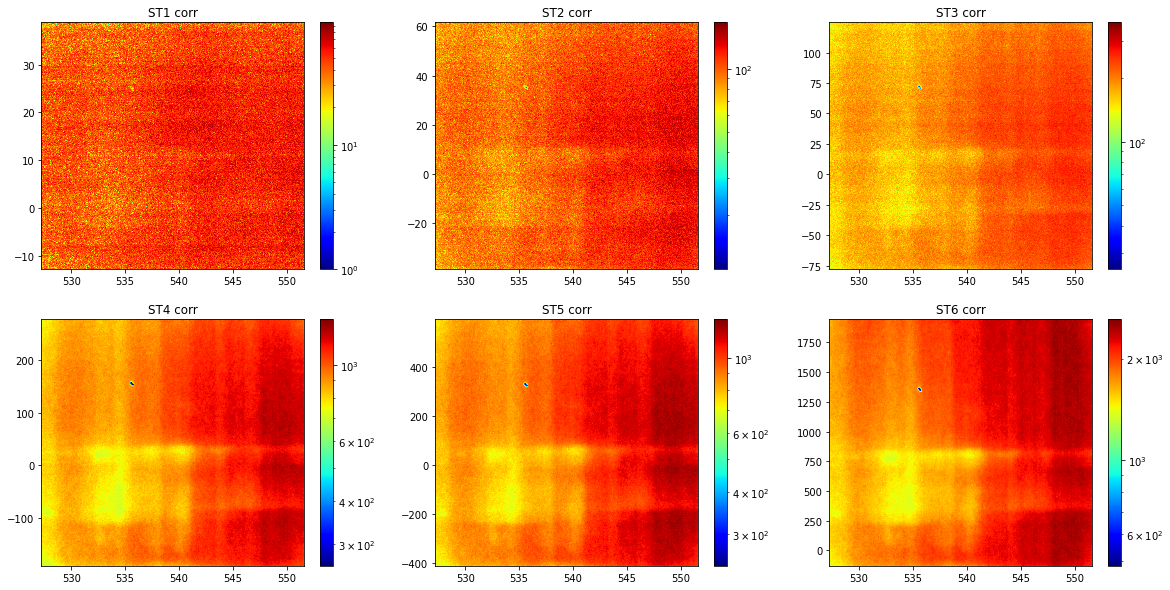

In [4]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes_list = [ax for row in axes for ax in row]
axes_iter = iter(axes_list)

for key in img_dict:
    img = img_dict[key]
    ax = next(axes_iter)
    plot_heatmap(df=img.data, fig=fig, ax=ax, title=img.title, vmax=None)

## Normalize data

In [5]:
for key in img_dict:
    df = img_dict[key].data
    df_max = df.max().max()
    df_min = df.min().min()
    df_mean = df.mean().mean()
    img_dict[key].data = ((df-df_min)/(df_max-df_min))
#     img_dict[key].data = df/df_mean

## Plot normalized data

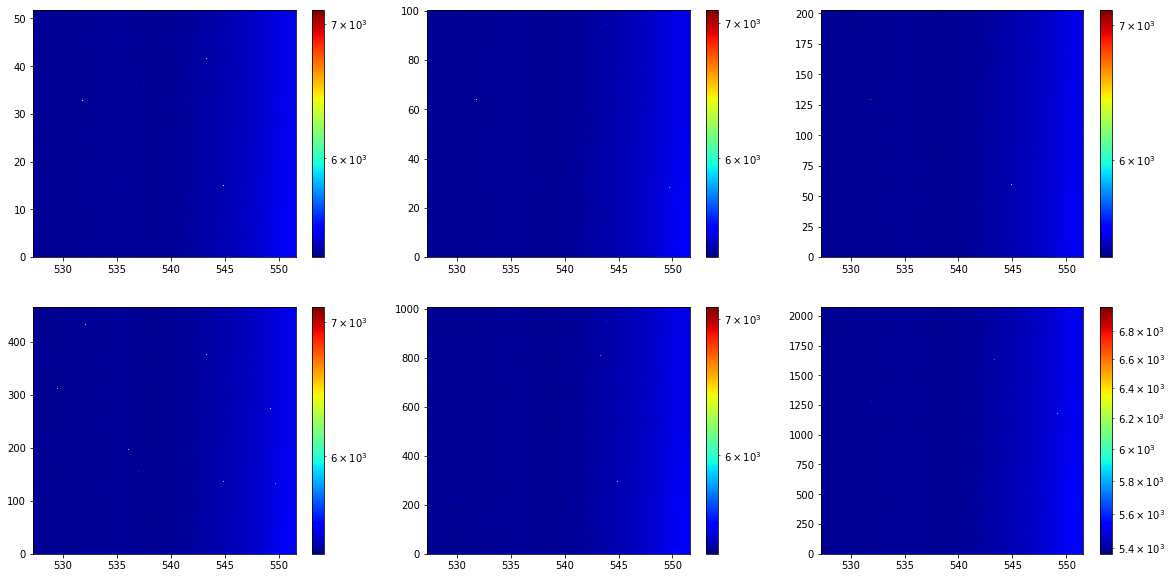

In [17]:
%ma
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes_list = [ax for row in axes for ax in row]
axes_iter = iter(axes_list)

for key in bg_dict:
    img = bg_dict[key]
    ax = next(axes_iter)
    plot_heatmap(df=img.data, fig=fig, ax=ax, title=img.title, vmin=None, vmax=None)

## Test corrections - WIP

Load files to test the corrections on. This is another series of white light images.

In [1]:
WIP

NameError: name 'WIP' is not defined

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
axes_list = [ax for row in axes for ax in row]
axes_iter = iter(axes_list)



## Export matrices as NumPy files
Note: All information about the original image, including the x- and y-axes, will be ommited.

In [14]:
prefix = "202004" # A unique id for the correction matrix. The simplest aproach is to use the year and month of the image but any arbitrary id is possible.
folder = "./files/camera_correction/"
for key in img_dict:
    img = img_dict[key]
    path_ = path.join(folder, f"{prefix}_{key}_{img.width}x{img.height}")
    np.save(path_,img.data.values)

Refer to the README of [StreakImage](https://github.com/nicohofdtz/streakimage) for information on where to place the created correction files and how to include them in the config.